In [1]:
from PyEIS.PyEIS import *

In [2]:
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_3_60.mpt']

In [3]:
re = EIS_exp(path, data)
re.df_raw

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,...,(Q-Qo)/mA.h,Analog OUT/V,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 22,w
0,1.000019e+06,4.460300,-1.654404,4.757239,20.350704,1.846600,-0.006100,0.255280,-0.096199,-0.011634,...,0.000027,0.0,-100.07990,0.197085,-0.073102,0.210206,-20.350704,2.699962e-05,NaN,6.283302e+06
1,8.912467e+05,81.200363,26.586645,85.442078,-18.129496,3.021489,-0.005735,0.002483,0.006717,0.000650,...,0.000052,0.0,-100.06387,0.011123,0.003642,0.011704,18.129496,2.526506e-05,NaN,5.599868e+06
2,7.943327e+05,84.775711,25.596819,88.555733,-16.800943,3.617471,-0.005383,0.002503,0.007828,0.000654,...,0.000053,0.0,-100.07188,0.010810,0.003264,0.011292,16.800943,4.765253e-07,NaN,4.990939e+06
3,7.079498e+05,87.778908,24.357256,91.095627,-15.508491,4.212478,-0.005097,0.002419,0.009230,0.000660,...,0.000053,0.0,-100.06387,0.010578,0.002935,0.010977,15.508491,5.237211e-07,NaN,4.448180e+06
4,6.309568e+05,90.483269,22.939228,93.345757,-14.225850,4.808487,-0.004837,0.002474,0.010996,0.000664,...,0.000054,0.0,-100.07188,0.010384,0.002633,0.010713,14.225850,5.834344e-07,NaN,3.964419e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.584685e+00,9156.752900,55367.918000,56119.984000,-80.609413,89.223122,-0.003903,0.000006,1.813923,1.765632,...,0.000083,0.0,-100.05585,0.000003,0.000018,0.000018,80.609413,-8.438469e-08,NaN,9.956872e+00
117,1.412238e+00,10537.426000,61299.355000,62198.461000,-80.246124,91.752113,-0.003905,0.000003,1.838469,1.785701,...,0.000083,0.0,-100.07188,0.000003,0.000016,0.000016,80.246124,1.248785e-07,NaN,8.873354e+00
118,1.259674e+00,12154.363000,67855.789000,68935.742000,-79.844841,94.579943,-0.003900,0.000001,1.861980,1.804097,...,0.000083,0.0,-100.08792,0.000003,0.000014,0.000015,79.844841,-1.305726e-07,NaN,7.914767e+00
119,1.122486e+00,13952.899000,75217.609000,76500.797000,-79.491058,97.747973,-0.003907,0.000005,1.885037,1.822330,...,0.000083,0.0,-100.03982,0.000002,0.000013,0.000013,79.491058,1.261614e-07,NaN,7.052785e+00


cycle || No. RC-elements ||   u
[1]            7            0.77


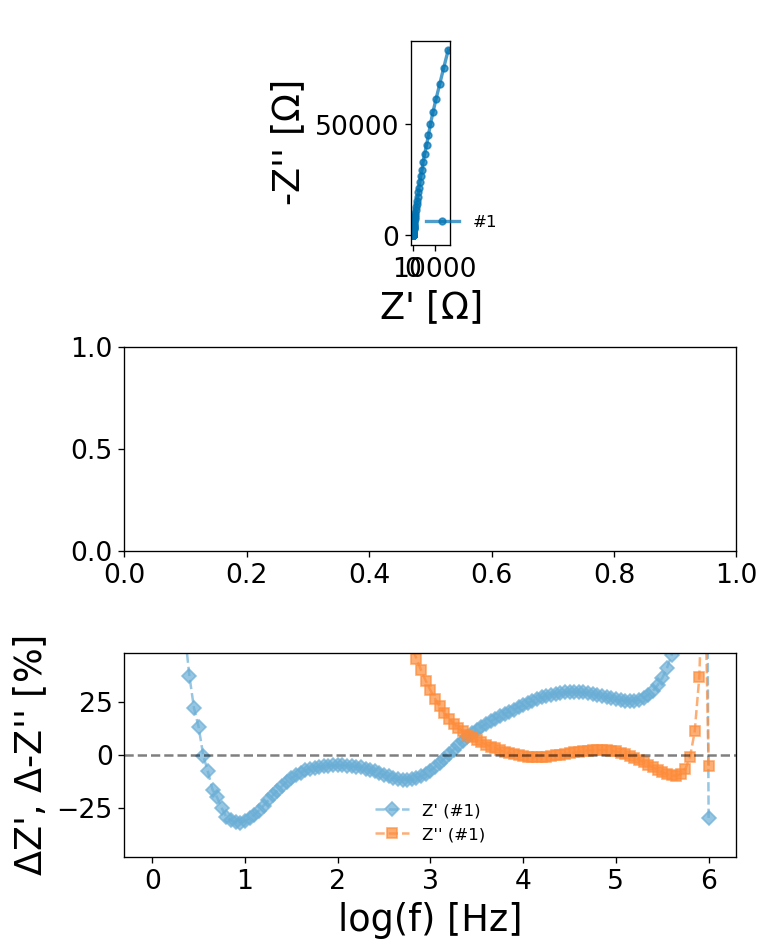

In [4]:
(re.Lin_KK(plot = 'w_data'))

In [5]:
adj_re = EIS_exp(path,data,mask = [10**5.5, 10**3.5])

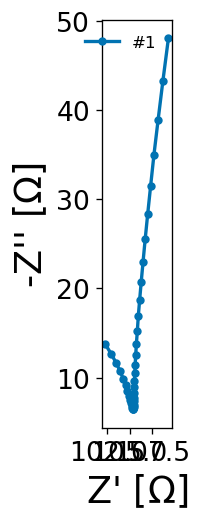

In [6]:
adj_re.EIS_plot()

In [7]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 105
    # data points      = 78
    # variables        = 7
    chi-square         = 164146.390
    reduced chi-square = 2311.92098
    Akaike info crit   = 610.840798
    Bayesian info crit = 627.337760
[[Variables]]
    Rs:   0.53104613 +/- 292.664526 (55110.94%) (init = 1000)
    R:    297.119365 +/- 371.265363 (124.95%) (init = 2959)
    n:    0.65019296 +/- 0.65252958 (100.36%) (init = 0.8)
    fs:   135039.810 +/- 169878.368 (125.80%) (init = 23023)
    R2:   2467798.67 +/- 5.0739e+10 (2056024.46%) (init = 258738)
    n2:   1.13412246 +/- 1.06780739 (94.15%) (init = 0.8)
    fs2:  0.71333217 +/- 12937.5489 (1813678.02%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(R, n)    = -0.992
    C(Rs, R)   =  0.975
    C(Rs, n)   = -0.962
    C(n2, fs2) =  0.900
    C(R2, n2)  = -0.900
    C(R, n2)   =  0.805
    C(n, n2)   = -0.782
    C(Rs, fs)  =  0.714
    C(

In [8]:
adj_re.fit_Rs[0]


0.5310461285258107

In [10]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params1 = Parameters()
params1.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params1.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params1.add('n', value=n_guess, min=.65, max=1.2)
params1.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params1.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params1.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params1.add('n2', value=n2_guess, min=.65, max=1.2)
params1.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params1.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.EIS_fit(params=params1, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 112
    # data points      = 78
    # variables        = 7
    chi-square         = 7.2199e-04
    reduced chi-square = 1.0169e-05
    Akaike info crit   = -890.035745
    Bayesian info crit = -873.538783
[[Variables]]
    Rs:   47.3461866 +/- 0.24029638 (0.51%) (init = 53.10461)
    R:    56.7400809 +/- 0.37851309 (0.67%) (init = 297.1194)
    n:    1.10534163 +/- 0.01233888 (1.12%) (init = 0.650193)
    fs:   999989.320 +/- 18045.5480 (1.80%) (init = 135039.8)
    R2:   248410.184 +/- 3494958.88 (1406.93%) (init = 2467799)
    n2:   0.94370628 +/- 0.00295595 (0.31%) (init = 1.134122)
    fs2:  0.42220039 +/- 6.29567127 (1491.16%) (init = 0.7133322)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -0.968
    C(n, fs)   = -0.885
    C(R, n)    = -0.793
    C(R, fs)   =  0.784
    C(Rs, fs)  = -0.717
    C(Rs, n)   =  0.691
    C(n, n2)   = -0.504
    C(n2, fs2) = 

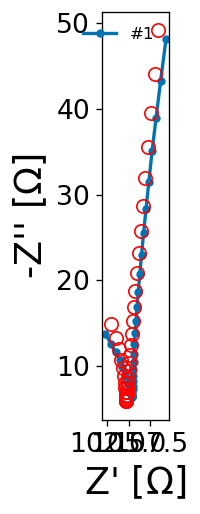

In [11]:
adj_re.EIS_plot(fitting = 'on')

In [12]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params2 = Parameters()
params2.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params2.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params2.add('n', value=n_guess, min=.65, max=1.2)
params2.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params2.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params2.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params2.add('n2', value=n2_guess, min=.65, max=1.2)
params2.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params2.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.EIS_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 460624
    # data points      = 78
    # variables        = 7
    chi-square         = 2.3624e-05
    reduced chi-square = 3.3273e-07
    Akaike info crit   = -1156.77736
    Bayesian info crit = -1140.28040
[[Variables]]
    Rs:   52.9860228 +/- 3.22621015 (6.09%) (init = 56.74008)
    R:    51.9328381 +/- 3.25766296 (6.27%) (init = 56.74008)
    n:    1.03428616 +/- 0.00988164 (0.96%) (init = 1.105342)
    fs:   1000000.00 +/- 220519.798 (22.05%) (init = 999989.3)
    R2:   25471.8797 +/- 66270.3474 (260.17%) (init = 248410.2)
    n2:   0.94781215 +/- 0.00340306 (0.36%) (init = 0.9437063)
    fs2:  4.77470645 +/- 13.2172731 (276.82%) (init = 0.4222004)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -1.000
    C(R, fs)   = -0.996
    C(Rs, fs)  =  0.995
    C(n2, fs2) =  0.909
    C(R2, n2)  = -0.907
    C(n, fs)   =  0.892
    C(R, n)    = -0.867
    C(Rs, n) 

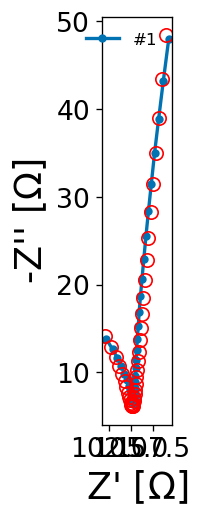

In [13]:
adj_re.EIS_plot(fitting = 'on')

In [25]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


52.9860228084285
51.93283807344667
1.0342861600351647
999999.9999999485
25471.87974520534
0.9478121541424711
4.77470645325736


In [26]:
50.59,2.626e-9,1,54.58,1.457e-6,0.9547,4.793

(50.59, 2.626e-09, 1, 54.58, 1.457e-06, 0.9547, 4.793)

In [27]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(1.5648714631341907e-09, 2.653648181395838e-06)

In [28]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params3 = Parameters()
params3.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params3.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params3.add('n', value=n_guess, min=.65, max=1.2)
params3.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params3.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params3.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params3.add('n2', value=n2_guess, min=.65, max=1.2)
params3.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params3.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.EIS_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 460624
    # data points      = 78
    # variables        = 7
    chi-square         = 2.3624e-05
    reduced chi-square = 3.3273e-07
    Akaike info crit   = -1156.77736
    Bayesian info crit = -1140.28040
[[Variables]]
    Rs:   52.9860228 +/- 3.22621015 (6.09%) (init = 56.74008)
    R:    51.9328381 +/- 3.25766296 (6.27%) (init = 56.74008)
    n:    1.03428616 +/- 0.00988164 (0.96%) (init = 1.105342)
    fs:   1000000.00 +/- 220519.798 (22.05%) (init = 999989.3)
    R2:   25471.8797 +/- 66270.3474 (260.17%) (init = 248410.2)
    n2:   0.94781215 +/- 0.00340306 (0.36%) (init = 0.9437063)
    fs2:  4.77470645 +/- 13.2172731 (276.82%) (init = 0.4222004)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -1.000
    C(R, fs)   = -0.996
    C(Rs, fs)  =  0.995
    C(n2, fs2) =  0.909
    C(R2, n2)  = -0.907
    C(n, fs)   =  0.892
    C(R, n)    = -0.867
    C(Rs, n) 

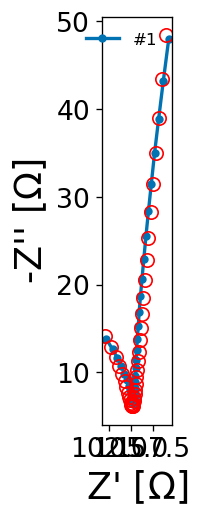

In [29]:
adj_re.EIS_plot(fitting = 'on')

In [30]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


52.9860228084285
51.93283807344667
1.0342861600351647
999999.9999999485
25471.87974520534
0.9478121541424711
4.77470645325736


In [31]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(1.5648714631341907e-09, 2.653648181395838e-06)